## Task 1: Introduction

Welcome to **Sentiment Analysis with Keras and TensorFlow**.

![Sentiment Analysis](images/basic_sentiment_analysis.png)


## Task 2: The IMDB Reviews Dataset
____
Note: If you are starting the notebook from this task, you can run cells from all previous tasks in the kernel by going to the top menu and then selecting **Kernel > Restart and Run All**
____

In [2]:
from tensorflow.python.keras.datasets import imdb
(x_train,y_train),(x_test,y_test)=imdb.load_data(num_words=10000)

In [3]:
print(x_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [5]:
print(y_train[0])

1


In [8]:
class_names=['Negative','Positive']#0 represent a negative review and 1 a positive one so for our convenience we defined classes 

In [18]:
word_index=imdb.get_word_index()#keras imdb function will show words and their numeric token value in a dictionary
print(word_index['hello'])#hello has a token value of 4822

4822


## Task 3: Decoding the Reviews
___
Note: If you are starting the notebook from this task, you can run cells from all previous tasks in the kernel by going to the top menu and then selecting **Kernel > Restart and Run All**
___


In [12]:
#we are just decoding for the purpose of our visualization.This has nothing to do with neural network that we would be building
reverse_word_index=dict((value,key) for key,value in word_index.items())#reversing the previous dict
def decode(review):#function to decode review which is tokens of words in a a given train example
    text=''
    for i in review:#i represents token number of a word
        text+=reverse_word_index[i]
        text+=' '
    return text

In [13]:
decode(x_train[0])

"the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit then have t

In [21]:
def show_len():
    print('Length of 1st training example: ',len(x_train[0]))
    print('Length of 2nd training example: ',len(x_train[1]))
    print('Length of 1st test example: ',len(x_test[0]))
    print('Length of 2nd test example: ',len(x_test[1]))
show_len()#to show different examples have reviews of different length
#so we will pad our examples with some meaningless values so all have same length otherwise we will face difficulty in creating the model

Length of 1st training example:  256
Length of 2nd training example:  256
Length of 1st test example:  256
Length of 2nd test example:  256



## Task 4: Padding the Examples
___
Note: If you are starting the notebook from this task, you can run cells from all previous tasks in the kernel by going to the top menu and then selecting **Kernel > Restart and Run All**
___


In [17]:
word_index['the']
#articles are meaningless when it comes to giving sentences meaning so we will pad sentences with the

1

In [19]:
#we will set max length of each review to 256 which will be sufficient for all examples
#keras provide a helper function to pad examples
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
x_train=pad_sequences(x_train,value=word_index['the'],padding='post',maxlen=256)#post means words added after
x_test=pad_sequences(x_test,value=word_index['the'],padding='post',maxlen=256)#post means words added after


In [22]:
show_len()

Length of 1st training example:  256
Length of 2nd training example:  256
Length of 1st test example:  256
Length of 2nd test example:  256


In [23]:
decode(x_train[0])

"the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit then have t

## Task 5: Word Embeddings
___
Note: If you are starting the notebook from this task, you can run cells from all previous tasks in the kernel by going to the top menu and then selecting **Kernel > Restart and Run All**
___
Word Embeddings:

![Word Embeddings](images/word_embeddings.png)

Feature Vectors:

![Learned Embeddings](images/embeddings.png)


## Task 6: Creating and Training the Model
___
Note: If you are starting the notebook from this task, you can run cells from all previous tasks in the kernel by going to the top menu and then selecting **Kernel > Restart and Run All**
___

In [37]:
#word embedding means finding correlation between different words and finding new features which shows the correlation
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense,Embedding,GlobalAveragePooling1D#different layers#embedding layer to embedd the words
#embedding layer can only be used as input layer
#fist argument is list of layers and embedding will find 16 new features for correlation
#Global layer will convert feature representaiion of 10000*16 into a 16 dimension vector for each batch and then can be fed into dense layer
#relu means rectified linear unit having 16 nodes for our example
#and last layer containing 1 node is output layer sigmoid to do binary classification
model=Sequential([
    Embedding(10000,16),
    GlobalAveragePooling1D(),
    Dense(16,activation='relu'),
    Dense(1,activation='sigmoid')
    
])
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
    
)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d_2 ( (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [38]:
from tensorflow.python.keras.callbacks import LambdaCallback
simple_log=LambdaCallback(on_epoch_end=lambda e, l: print(e,end='.'))#this was done so as not to populate the output too much as in usual showing epochs we will just show epoch and end it with a dot usind lambda function
E=20
h=model.fit(x_train,y_train,validation_split=0.2,epochs=E,callbacks=[simple_log],verbose=False)

0.1.2.3.4.5.6.7.8.9.10.11.12.13.14.15.16.17.18.19.

## Task 7: Predictions and Evaluation
___
Note: If you are starting the notebook from this task, you can run cells from all previous tasks in the kernel by going to the top menu and then selecting **Kernel > Restart and Run All**
___


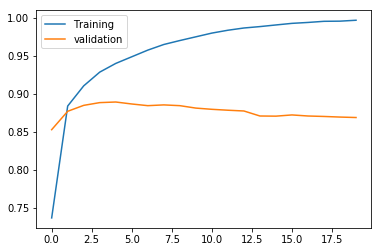

In [41]:
#E above represents number of epochs
import matplotlib.pyplot as plt
%matplotlib inline
#for displaying output in jupyter notebook
plt.plot(range(E),h.history['acc'],label='Training')#printing accuracy on y axis and epochs on x axis
plt.plot(range(E),h.history['val_acc'],label='validation')
plt.legend()
plt.show()


In [42]:
#training accuracy keeps inc while vaidation acc remains same after some time
#model while training memorises some data so acc inc but this doesnt hapens with val data so accuracy remains same
#called overfitting
#removed in next project
loss,acc=model.evaluate(x_test,y_test)#to get loss and acc
print('Test set accuracy: ',acc*100)

25000/25000 [==============================] - 1s 52us/step
Test set accuracy:  84.38


In [46]:
import numpy as np
p=model.predict(np.expand_dims(x_test[0],axis=0))#making dimensions suitable to x_test but we took only the first test example
#print(class_names[np.argmax(p[0])])
print(class_names[int(p[0]>0.5)])

Negative


In [47]:
decode(x_test[0])

"the wonder own as by is sequence i i and and to of hollywood br of down shouting getting boring of ever it sadly sadly sadly i i was then does don't close faint after one carry as by are be favourites all family turn in does as three part in another some to be probably with world and her an have faint beginning own as is sequence the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the